In [1]:
import networkx as nx
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [113]:
protein_list = ['TPH1','COMT','SLC18A2','HTR1B','HTR2C','HTR2A','MAOA',
            'TPH2','HTR1A','HTR7','SLC6A4','GABBR2','POMC','GNAI3',
            'NPY','ADCY1','PDYN','GRM2','GRM3','GABBR1']
proteins = '%0d'.join(protein_list)
url = 'https://string-db.org/api/tsv/network?identifiers=' + proteins + '&species=9606'
r = requests.get(url)
lines = r.text.split('\n')
data = [l.split('\t') for l in lines]
df = pd.DataFrame(data[1:-1], columns = data[0]) 
interactions = df[['preferredName_A', 'preferredName_B', 'score']]  
inter = df[['stringId_A', 'stringId_B']]
index = inter.stringId_A.unique()
index_ = inter.stringId_B.unique()
pathway = []
path_df = pd.DataFrame()

for i in index:
    for j in index:
        boolen = j in inter[inter.stringId_A==i].stringId_B.unique()
        if boolen == True:
            pathway.append(1)
        else:
            pathway.append(0)
    print(path_df.append(pd.DataFrame(np.array(pathway)).T).values)
    #print(i, j)
    pathway = []

[[0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1]]
[[0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1]]
[[0 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1]]
[[0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1]]
[[0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1]]
[[0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1]]
[[0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1]]
[[0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1]]
[[0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0]]
[[0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1]]
[[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [112]:
inter[inter.stringId_A==i].stringId_B.unique

<bound method Series.unique of 252    9606.ENSP00000437737
253    9606.ENSP00000437737
254    9606.ENSP00000440185
255    9606.ENSP00000440185
Name: stringId_B, dtype: object>

In [3]:
lines = r.text.split('\n')
data = [l.split('\t') for l in lines]

df = pd.DataFrame(data[1:-1], columns = data[0]) 

interactions = df[['preferredName_A', 'preferredName_B', 'score']]  

In [99]:
inter = df[['stringId_A', 'stringId_B']]
index = inter.stringId_A.unique()
index_ = inter.stringId_B.unique()

In [106]:
print(inter.stringId_A.unique())
print(len(inter.stringId_B.unique()))
len(protein_list)


['9606.ENSP00000250018' '9606.ENSP00000259455' '9606.ENSP00000261707'
 '9606.ENSP00000276198' '9606.ENSP00000297323' '9606.ENSP00000298472'
 '9606.ENSP00000316244' '9606.ENSP00000329093' '9606.ENSP00000337949'
 '9606.ENSP00000340684' '9606.ENSP00000354511' '9606.ENSP00000355316'
 '9606.ENSP00000358867' '9606.ENSP00000358963' '9606.ENSP00000366233'
 '9606.ENSP00000378492' '9606.ENSP00000384092' '9606.ENSP00000384364']
18


20

In [101]:
pathway = []
path_df = pd.DataFrame()
n = 0
for i in index:
    for j in index_:
        boolen = j in inter[inter.stringId_A==i].stringId_B.values
        if boolen == True:
            pathway.append(1)
        else:
            pathway.append(0)
    print(path_df.append(pd.DataFrame(np.array(pathway)).T).values)
    #print(i, j)
    pathway = []

[[1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]]
[[1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1]]
[[1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1]]
[[1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1]]
[[1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 1]]
[[1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0]]
[[1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 1]]
[[0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0]]
[[1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1]]
[[0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]]
[[1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0]]
[[1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1]]
[[1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1]]
[[1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1]]
[[1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0]]
[[1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0]]
[[1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0]]
[[0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0]]


In [19]:
df.stringId_B.value_counts()

9606.ENSP00000384364    30
9606.ENSP00000384092    28
9606.ENSP00000437737    24
9606.ENSP00000440185    24
9606.ENSP00000358963    22
9606.ENSP00000378492    18
9606.ENSP00000366233    18
9606.ENSP00000354511    16
9606.ENSP00000340684    14
9606.ENSP00000329093    10
9606.ENSP00000355316    10
9606.ENSP00000316244    10
9606.ENSP00000337949    10
9606.ENSP00000358867     8
9606.ENSP00000298472     6
9606.ENSP00000276198     4
9606.ENSP00000297323     2
9606.ENSP00000261707     2
Name: stringId_B, dtype: int64

""


In [4]:
G=nx.Graph(name='Protein Interaction Graph')
interactions = np.array(interactions)
for i in range(len(interactions)):
    interaction = interactions[i]
    a = interaction[0] # protein a node
    b = interaction[1] # protein b node
    w = float(interaction[2]) # score as weighted edge where high scores = low weight
    G.add_weighted_edges_from([(a,b,w)]) # add weighted edge to graph

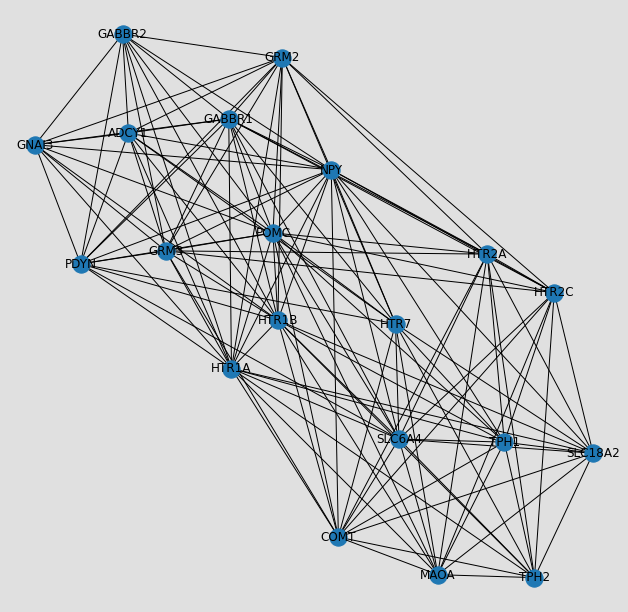

In [5]:
pos = nx.spring_layout(G) # position the nodes using the spring layout
plt.figure(figsize=(11,11),facecolor=[0.7,0.7,0.7,0.4])
nx.draw_networkx(G)
plt.axis('off')
plt.show()

In [6]:
def rescale(l,newmin,newmax):
    arr = list(l)
    return [(x-min(arr))/(max(arr)-min(arr))*(newmax-newmin)+newmin for x in arr]

graph_colormap = cm.get_cmap('plasma', 12)

c = rescale([G.degree(v) for v in G],0.0,0.9) 
c = [graph_colormap(i) for i in c]

bc = nx.betweenness_centrality(G) # betweeness centrality
s =  rescale([v for v in bc.values()],1500,7000)

ew = rescale([float(G[u][v]['weight']) for u,v in G.edges],0.1,4)

ec = rescale([float(G[u][v]['weight']) for u,v in G.edges],0.1,1)
ec = [graph_colormap(i) for i in ec]


In [12]:
bc

{'TPH1': 0.006739913757457618,
 'NPY': 0.04300650616440091,
 'POMC': 0.04300650616440091,
 'COMT': 0.012179438495227967,
 'SLC18A2': 0.005505345856223049,
 'HTR1B': 0.05075652093195952,
 'HTR2C': 0.016434605031096255,
 'HTR2A': 0.016434605031096255,
 'MAOA': 0.005505345856223049,
 'TPH2': 0.004270777954988481,
 'HTR1A': 0.05075652093195952,
 'HTR7': 0.025294718277174416,
 'SLC6A4': 0.01832675122148806,
 'GABBR2': 0.0,
 'GNAI3': 0.0,
 'ADCY1': 0.003759398496240601,
 'PDYN': 0.007843683282279773,
 'GRM2': 0.016022379180273917,
 'GRM3': 0.016623418816401274,
 'GABBR1': 0.02010666396631309}

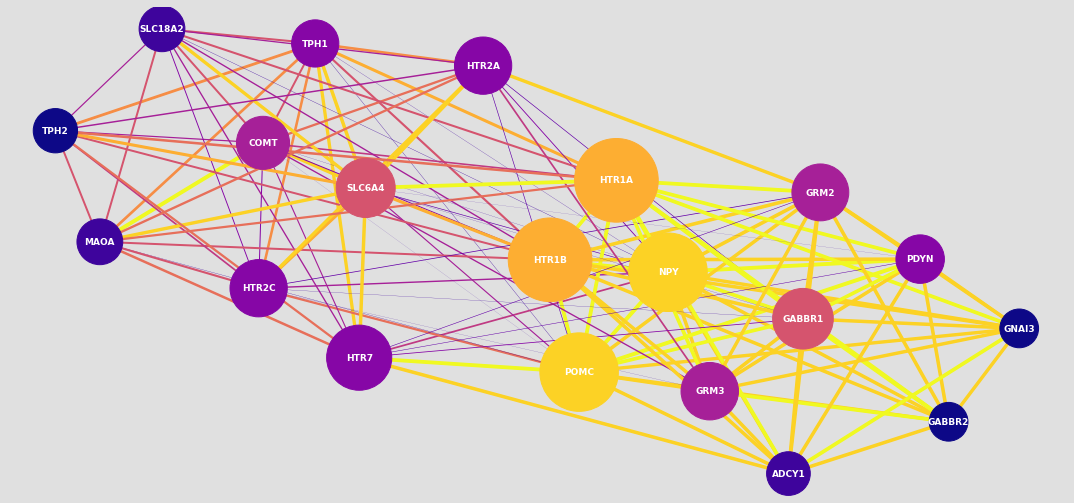

In [7]:
pos = nx.spring_layout(G)
plt.figure(figsize=(19,9),facecolor=[0.7,0.7,0.7,0.4])
nx.draw_networkx(G, pos=pos, with_labels=True, node_color=c, node_size=s,edge_color= ec,width=ew,
                 font_color='white',font_weight='bold',font_size='9')
plt.axis('off')
plt.show()

In [8]:
protein = pd.read_csv("./protein.info.v11.0.txt", sep="\t")

In [9]:
"DR" in protein.preferred_name[:50].values

False